## Pandas로 시각화하기


In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

E: dpkg was interrupted, you must manually run 'dpkg --configure -a' to correct the problem. 


In [0]:
# 우선 실행해 주세요
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.font_manager as fm
from sklearn.datasets import load_iris

# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

## 예제 데이터 ) IRIS Dataset

아이리스(붓꽃) 꽃에 대한 데이터 셋으로, 꽃잎의 각 부분의 너비와 길이 등을 측정한 데이터이며 150개의 row가 있습니다. 

![](http://cfs13.tistory.com/original/27/tistory/2009/11/29/22/54/4b127d29159f6)

| feature name | 의미 |
| ---- |---- |
| sepal length | 꽃받침의 길이 정보 |
| sepal width  | 꽃받침의 너비 정보 |
| petal length | 꽃잎의 길이 정보 |
| petal width  | 꽃잎의 너비 정보 |
| species | 꽃의 종류. setosa / versicolor / virginica의 세종류가 있음 |

In [0]:
# 우선 실행해주세요!
dataset = load_iris()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
target = pd.Series(dataset['target']).map({0:"setosa",1:"versicolor",2:'virginica'})
df['species'] = target

df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
137,6.4,3.1,5.5,1.8,virginica
66,5.6,3.0,4.5,1.5,versicolor
81,5.5,2.4,3.7,1.0,versicolor
32,5.2,4.1,1.5,0.1,setosa
1,4.9,3.0,1.4,0.2,setosa


## 문제 1) 꽃의 종류에 따른 평균 꽃받침의 길이 비교 

![Imgur](https://i.imgur.com/7lDivi5.png)


#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

***주의***
* 브라우저나 jupyter의 버전 별로 출력된 형태가 다를 수 있습니다. 
* 색상이나 폰트 보다, 내용과 시각화된 요소들을 위주로 빠짐없이 구현해 주세요

In [0]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


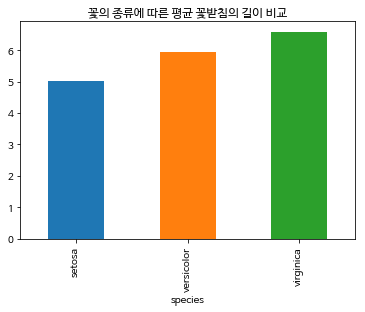

In [0]:
sepal = df.groupby('species')['sepal length (cm)'].mean()
sepal.plot(kind='bar', colors=['C0', 'C1', 'C2'])
plt.title('꽃의 종류에 따른 평균 꽃받침의 길이 비교')
plt.xlabel('species')

plt.show()

## 문제 2. 꽃잎의 길이와 너비의 산포도

![Imgur](https://i.imgur.com/PwlLid5.png)

In [0]:
# 우선 실행해주세요!
dataset = load_iris()
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
target = pd.Series(dataset['target']).map({0:"setosa",1:"versicolor",2:'virginica'})
df['species'] = target

#### 답안지 입력란
* 아래에 답을 서술하여 주세요
* 결과 그림이 위와 동일하도록 만들어 주세요

***주의***
* 브라우저나 jupyter의 버전 별로 출력된 형태가 다를 수 있습니다. 
* 색상이나 폰트 보다, 내용과 시각화된 요소들을 위주로 빠짐없이 구현해 주세요

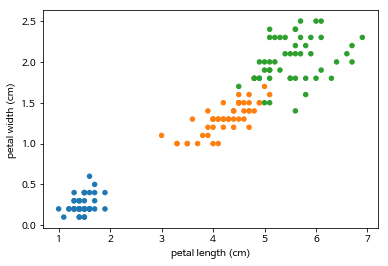

In [0]:
encodes = target.astype('category').cat.codes
color = ['C{}'.format(encode) for encode in encodes]
df.plot.scatter(x='petal length (cm)', y='petal width (cm)', color=color)